<a href="https://colab.research.google.com/github/m-eicardi/MTEch-2021/blob/main/Exerc%C3%ADcio2_MTEch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercício 2 - MTEch

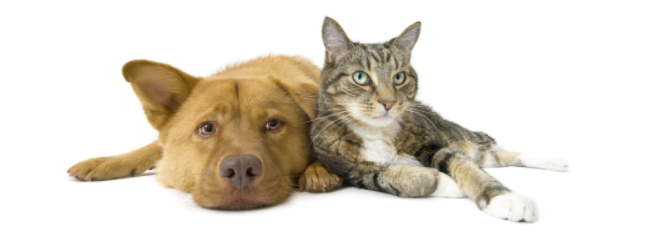

> Este é o segundo de três exercícios práticos que serão disponibilizados durante o
MTEch 2021.


> Durante a mudança para um novo local maior e mais bem equipado, o Abrigo Animal de Bloomington perdeu sua planilha de análise de dados que um antigo funcionário criou e agora só tem a base bruta, contendo diversas informações sobre seus animais, que são também os mais fofos do planeta!





###1. Importando a base de dados


In [2]:
from google.colab import files

uploaded = files.upload()

Saving Saving animal-data-1.csv to Saving animal-data-1.csv


In [4]:
import pandas as pd

dados = pd.read_csv('Saving animal-data-1.csv')

dados

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
0,15801,2009-11-28 00:00:00,Moving,0,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortie,Cat,9.20,Female,Adoptable Cat Glass Colony,2017-05-13 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
1,15932,2009-12-08 00:00:00,Moving,0,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,9.10,Male,Adoptable Dogs,2017-04-24 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
2,28859,2012-08-10 00:00:00,Abandoned,0,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,6.80,Female,Adoptable Dogs,2017-04-15 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
3,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,8.11,Female,Stray Cats,2017-04-18 00:00:00,Foster,0.0,2018-05-29 00:00:00,Stray,NaN,Died in care,0,0,0
4,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,8.11,Female,Stray Cats,2018-05-29 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10285,64584,2019-08-27 16:52:09,Litter relinquishment,0,C19081429,981020029330984,Max,Domestic Medium Hair,Orange and White,Cat,21.00,Male,Cat room C,2019-08-29 00:00:00,Adoption,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0
10286,64588,2019-08-27 18:14:11,Stray,0,C19081418,981020033133599,Punkin,Domestic Short Hair,Calico,Cat,6.00,Female,Cat room C,2019-08-28 00:00:00,Foster,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0
10287,64606,2019-08-29 12:10:21,Stray,0,D19081440,0A1243400C,Dozer,Coonhound,Red,Dog,6.80,Male,Dog room B,2019-08-29 00:00:00,Reclaimed,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0
10288,64608,2019-08-29 18:58:06,Stray,0,D19081421,982000363034690,Lucy Farmer,Beagle,Tricolour,Dog,7.50,Female,Canine intake room,2019-08-30 00:00:00,Reclaimed,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0


###2. Perguntas

*2.1 Quais são as espécies de animais do abrigo e quantos são*

In [6]:
#quais são as espécies
dados['speciesname'].unique()

array(['Cat', 'Dog', 'House Rabbit', 'Rat', 'Bird', 'Opossum', 'Chicken',
       'Wildlife', 'Ferret', 'Tortoise', 'Pig', 'Hamster', 'Guinea Pig',
       'Gerbil', 'Lizard', 'Hedgehog', 'Chinchilla', 'Goat', 'Snake',
       'Squirrel', 'Sugar Glider', 'Turtle', 'Tarantula', 'Mouse',
       'Raccoon', 'Livestock', 'Fish'], dtype=object)

In [7]:
#quantos são
dados['speciesname'].value_counts()

Cat             5749
Dog             3900
House Rabbit     218
Rat              130
Guinea Pig        93
Bird              38
Livestock         18
Hamster           17
Hedgehog          15
Mouse             13
Gerbil            12
Pig               11
Ferret            11
Chicken           10
Snake              8
Lizard             7
Wildlife           7
Fish               6
Opossum            6
Sugar Glider       5
Goat               5
Turtle             4
Tortoise           2
Chinchilla         2
Tarantula          1
Raccoon            1
Squirrel           1
Name: speciesname, dtype: int64

In [21]:
dados['speciesname'].value_counts().sum()

10290

O total de animais no abrigo é: 10290 

*2.2 Quantos são machos e quantos são fêmeas*

In [9]:
dados['sexname'].value_counts()

Male       5086
Female     4968
Unknown     236
Name: sexname, dtype: int64

Temos 5086 machos, 4968 fêmeas e 236 sem sexo definido

*2.3 Qual a idade média dos gatos (Cats)*

In [20]:
dados.speciesname == 'Cat'

0         True
1        False
2        False
3         True
4         True
         ...  
10285     True
10286     True
10287    False
10288    False
10289    False
Name: speciesname, Length: 10290, dtype: bool

In [22]:
#apenas gatitos
dados[(dados.speciesname == 'Cat')]

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
0,15801,2009-11-28 00:00:00,Moving,0,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortie,Cat,9.20,Female,Adoptable Cat Glass Colony,2017-05-13 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
3,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,8.11,Female,Stray Cats,2017-04-18 00:00:00,Foster,0.0,2018-05-29 00:00:00,Stray,NaN,Died in care,0,0,0
4,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,8.11,Female,Stray Cats,2018-05-29 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
12,46437,2016-10-26 00:00:00,Abandoned,0,C16103406,981020017650993,Nova,Domestic Long Hair,Black,Cat,12.30,Female,Stray Cats,2017-03-25 00:00:00,Foster,0.0,2017-04-07 00:00:00,Stray,2018-02-10 00:00:00,"UU - untreatable, unmanageable",0,1,0
13,46437,2016-10-26 00:00:00,Abandoned,0,C16103406,981020017650993,Nova,Domestic Long Hair,Black,Cat,12.30,Female,Stray Cats,2017-04-07 00:00:00,Adoption,0.0,2018-02-09 00:00:00,Incompatible with owner lifestyle,2018-02-10 00:00:00,"UU - untreatable, unmanageable",0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10280,64564,2019-08-26 15:33:00,Stray,0,C19081412,NaN,Kitty M,Domestic Short Hair,Tortie,Cat,3.00,Female,Cat room C,2019-08-30 00:00:00,Reclaimed,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0
10283,64574,2019-08-26 16:48:35,Litter relinquishment,0,C19081422,981020031843935,Maeve,Domestic Short Hair,Tabbico,Cat,6.00,Female,Adoptable Cat Glass Colony,2019-08-30 00:00:00,Adoption,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0
10284,64582,2019-08-27 16:12:00,Allergies,0,C19081427,981020031831911,Whiskers,Domestic Short Hair,Grey,Cat,16.00,Male,Adoptable Cat Kennels,2019-08-30 00:00:00,Adoption,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0
10285,64584,2019-08-27 16:52:09,Litter relinquishment,0,C19081429,981020029330984,Max,Domestic Medium Hair,Orange and White,Cat,21.00,Male,Cat room C,2019-08-29 00:00:00,Adoption,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0


In [24]:
#armazenando em uma variável
dados_cat = dados[(dados.speciesname == 'Cat')]

dados_cat

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
0,15801,2009-11-28 00:00:00,Moving,0,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortie,Cat,9.20,Female,Adoptable Cat Glass Colony,2017-05-13 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
3,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,8.11,Female,Stray Cats,2017-04-18 00:00:00,Foster,0.0,2018-05-29 00:00:00,Stray,NaN,Died in care,0,0,0
4,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,8.11,Female,Stray Cats,2018-05-29 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
12,46437,2016-10-26 00:00:00,Abandoned,0,C16103406,981020017650993,Nova,Domestic Long Hair,Black,Cat,12.30,Female,Stray Cats,2017-03-25 00:00:00,Foster,0.0,2017-04-07 00:00:00,Stray,2018-02-10 00:00:00,"UU - untreatable, unmanageable",0,1,0
13,46437,2016-10-26 00:00:00,Abandoned,0,C16103406,981020017650993,Nova,Domestic Long Hair,Black,Cat,12.30,Female,Stray Cats,2017-04-07 00:00:00,Adoption,0.0,2018-02-09 00:00:00,Incompatible with owner lifestyle,2018-02-10 00:00:00,"UU - untreatable, unmanageable",0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10280,64564,2019-08-26 15:33:00,Stray,0,C19081412,NaN,Kitty M,Domestic Short Hair,Tortie,Cat,3.00,Female,Cat room C,2019-08-30 00:00:00,Reclaimed,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0
10283,64574,2019-08-26 16:48:35,Litter relinquishment,0,C19081422,981020031843935,Maeve,Domestic Short Hair,Tabbico,Cat,6.00,Female,Adoptable Cat Glass Colony,2019-08-30 00:00:00,Adoption,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0
10284,64582,2019-08-27 16:12:00,Allergies,0,C19081427,981020031831911,Whiskers,Domestic Short Hair,Grey,Cat,16.00,Male,Adoptable Cat Kennels,2019-08-30 00:00:00,Adoption,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0
10285,64584,2019-08-27 16:52:09,Litter relinquishment,0,C19081429,981020029330984,Max,Domestic Medium Hair,Orange and White,Cat,21.00,Male,Cat room C,2019-08-29 00:00:00,Adoption,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0


In [25]:
dados_cat['animalage'].mean()

6.803459996513826

A idade média dos gatos do abrigo é 6,80 anos

In [ ]:
# Outra alternativa: media_gatos = df.loc[df['speciesname'] == 'Cat']['animalage'].mean()

*2.4 Qual o animal mais velho*

In [26]:
dados['animalage']

0         9.20
1         9.10
2         6.80
3         8.11
4         8.11
         ...  
10285    21.00
10286     6.00
10287     6.80
10288     7.50
10289    33.00
Name: animalage, Length: 10290, dtype: float64

In [30]:
#idade máxima
animal_velho = dados['animalage'].max()

animal_velho

100.6

O animal mais velho tem 100,6 anos

In [31]:
#qual é o animal
dados.loc[dados['animalage'] == 100.6]['animalname']

637       Pop
908    Yertle
Name: animalname, dtype: object

 *2.5 Quantos vira-latas caramelo (basecolour = Brown) com mais de 5 anos o abrigo possui*

In [33]:
#usando a funçao loc para localizar apenas cachorros da cor caramelo
#e com idade maior que 5 anos

catioro_caramelo = dados.loc[(dados['basecolour'] == 'Brown') & (dados['speciesname'] == 'Dog') & (dados['animalage'] > 5)]

catioro_caramelo

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
141,47715,2017-03-23 00:00:00,Abandoned,0,D17031722,981020021067077,Renesmee,Pitbull/Mix,Brown,Dog,6.2,Female,Office,2017-05-11 00:00:00,Foster,0.0,2017-07-06 00:00:00,Stray,NaN,Died in care,0,0,0
142,47715,2017-03-23 00:00:00,Abandoned,0,D17031722,981020021067077,Renesmee,Pitbull/Mix,Brown,Dog,6.2,Female,Office,2017-07-09 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
153,47727,2017-03-24 00:00:00,Abandoned,0,D17031734,0A1220492C,Elliot,Terrier/Beagle,Brown,Dog,9.8,Male,Adoptable Dogs,2017-04-08 00:00:00,Adoption,0.0,2017-11-03 00:00:00,Incompatible with owner lifestyle,NaN,Died in care,0,0,0
154,47727,2017-03-24 00:00:00,Abandoned,0,D17031734,0A1220492C,Elliot,Terrier/Beagle,Brown,Dog,9.8,Male,Adoptable Dogs,2017-11-15 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
569,55616,2017-04-22 09:13:45,Rabies Monitoring,0,D1704003,NaN,Hoover,Shar-Pei/Pit Bull Terrier,Brown,Dog,5.7,Male,Stray Dogs Theta,2017-05-02 00:00:00,Reclaimed,0.0,NaN,Stray,NaN,Died in care,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,64108,2019-07-24 12:35:47,Stray,0,D19071161,981020031379487,Douglas,Shep Mix/Basset Hound,Brown,Dog,14.0,Male,Adoptable Dogs,2019-07-31 00:00:00,Adoption,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0
10082,64252,2019-08-02 17:06:26,Transfer from Other Shelter,0,D19081226,981020031842458,Roux,Husky/Shepherd,Brown,Dog,11.0,Female,Canine intake room,2019-08-14 00:00:00,Adoption,0.0,2019-08-19 00:00:00,Return adopt - lifestyle issue,NaN,Court Order/ Legal,0,0,0
10083,64252,2019-08-02 17:06:26,Transfer from Other Shelter,0,D19081226,981020031842458,Roux,Husky/Shepherd,Brown,Dog,11.0,Female,Canine intake room,2019-08-19 00:00:00,Reclaimed,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0
10095,64265,2019-08-02 19:29:05,Stray,0,D19081237,981020031373940,Swiss,Hound/Terrier,Brown,Dog,16.0,Female,Dog room D,2019-08-08 00:00:00,Adoption,0.0,2019-08-12 00:00:00,Return Adopt - Other,NaN,Court Order/ Legal,0,0,0


Há 69 cachorros caramelo no abrigo